<a href="https://colab.research.google.com/github/cu-applied-math/stem-camp-notebooks/blob/master/2021/MachineLearning/MNIST_Handwriting_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning to Read with Sklearn: The MNIST Handwriting Dataset

In this lab:
<br>
$\;\;\;\;\;\;$-Import the MNIST (Modified National Institute of Standards and Technology) set of handwritten digits
<br>
$\;\;\;\;\;\;$-Visualize our data
<br>
$\;\;\;\;\;\;$-Use the SKlearn library in Python to Create a training set and a testing set of the data
<br>
$\;\;\;\;\;\;$-Using Sklearn, Train a model to recognize handwritten digits
<br>
$\;\;\;\;\;\;$-Interpret and visualize the results
<br>
Prereqs:
<br>
$\;\;\;\;\;\;$-Data matrices and vectors
<br>
$\;\;\;\;\;\;$-Logistic Regression
<br>
$\;\;\;\;\;\;$-Training sets vs. Testing sets



In [2]:
#@title
#Lets import some critical libraries and other tools!

from sklearn.datasets import fetch_openml             #This command from the Sklearn Library will help us access the dataset

from sklearn.model_selection import train_test_split  #For splitting the dataset into a training set and a testing set 

from sklearn.linear_model import LogisticRegression   #Our Logistic Regression Model

from sklearn import metrics                           #Some helpful tools for understanding our results          

import numpy as np                                    #Numpy is always helpful!

import matplotlib.pyplot as plt                       #A popular graphing library for visualization



# Part 1: Loading the MNIST Dataset 

The MNIST Handwriting dataset is very famous, and we actually quickly fetch it by using the Sklearn function "fetch_openml". How cool is that?!

In [4]:

#Fetch our handwriting data
mnist = fetch_openml('mnist_784', version= 1, as_frame= False)

#after loading the data, lets show the keys so we can understand what this data set comes with
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [7]:
#As an example, lets call one of the keys (what looks like a description):
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

### Ok, we've loaded our data. But what do we actually have?



In [ ]:

print(mnist.data)

#Hmmm, what exactly is going on here? Remember our lesson on vectorizing photos from yesterday? We have a collection of vectorized photos, organized into a larger data matrix!

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Before we go on, can you predict the dimensions of our data matrix? Each photo is 28 x 28 pixels. There are 70000 photos. What is your guess?

In [8]:
print(mnist.data.shape)

(70000, 784)


### Did you guess right?! Checking the shape is always a good idea, so you know how the data matrix is oriented (and what permissible matrix multiplications you can perform!)

### Next, lets look at the labels the data came with. These are critical for supervised learning.

In [9]:
#@title
print(mnist.target)

['5' '0' '4' ... '4' '5' '6']


### Each row is a vectorized handwritten number. The first number is a 5, based on the target data. Lets take a closer look at the data for this single digit:

In [12]:
#@title
digit = 0
mnist.data[digit]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### This doesn't look like a number yet, Lets "Reshape" it, into the original square that the digit was

In [13]:
#@title
testimage = np.reshape(mnist.data[digit], (28, 28))
print(testimage)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

### Hmm, still a little hard to see whats going on. Instead of looking at this array, let's print the first 5 numbers :

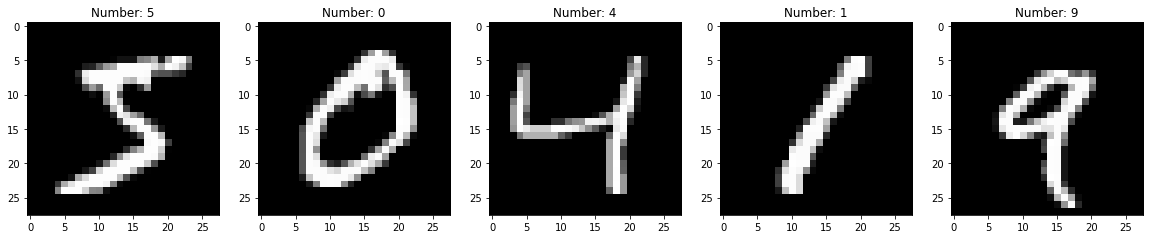

In [14]:
#@title
plt.figure(figsize =(20,4))
for index, (image, label) in enumerate(zip(mnist.data[:5], mnist.target[:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap = 'gray')
    plt.title('Number: %s' % label)

### Now these look handwritten to me!

# Part 2: Training Our Model 

### Remember how we train the model on different data than we test it on? Lets do a training set of 80% of our data and test on the rest. Sklearn makes this super easy to produce these different sets...

In [15]:
#@title
X_train, X_test, Y_train, Y_test = train_test_split(mnist.data, mnist.target, test_size = 0.2)

### ...Speaking of easy, watch how easy Sklearn makes it to train our model (this could take a little while):

In [16]:
#@title
#The next two lines of code train a model, using our training data
mdl = LogisticRegression(solver = 'lbfgs')
mdl.fit(X_train, Y_train)

#The next two lines create predictions from our test data, so we can see how well we did
predictions = mdl.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### You may get an error "STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT". That's ok! The program wants you to know that  you maxed out on iterations before converging to a solution. In theory, we could improve our accuracy by increasing iterations. For now, these results are good enough.

# Part 3: Understanding our results

### Lets look at the model score. What does this mean? Do you think this is a good model? Here's another question: Did the model perform better on the Test Set or the Training Set? Does this makes sense to you?

In [17]:
#Test our model on the "test set"
TestScore = mdl.score(X_test, Y_test)
print(TestScore)

0.9205714285714286


In [18]:
#Test our model on the "training set"
TrainingScore = mdl.score(X_train, Y_train)
print(TrainingScore)

0.9354464285714286


### Run the next cell to visualize a single digit from our test set. Compare it to the model prediction:

Our model predicts: 7


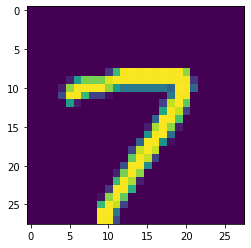

In [19]:
index = 1
plt.imshow(np.reshape(X_test[index], (28,28)))
print("Our model predicts: " + mdl.predict([X_test[index]])[0])

### Change the "index" value above, and look at a few numbers. Can you find one where the prediction doesn't match the picture? 

# Part 4: Visualizing Our Results

### The scores above are interesting...but we can understand the performance of this model in more detail. As we discussed, we can use a Confusion Matrix to visualize our results. Sklearn makes it very easy to generate this: 

In [20]:
#@title
cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[1345    0    6    2    3   10    8    3   11    1]
 [   0 1564    2    7    1    5    1    4   15    3]
 [   1   15 1274   20   20    8   15   20   39    7]
 [   4    5   32 1258    0   50    7   15   35    2]
 [   9    1    6    2 1277    3   15    5   10   61]
 [  10    4    9   46   15 1079   20    6   35   21]
 [  11    2   13    0    7   22 1314    1    6    2]
 [   7   12   13    9   10    5    1 1364    7   43]
 [   5   22   20   35    4   36   20    0 1191   13]
 [   7    8    2   19   35    4    0   37   19 1222]]


### Ok, but its a little tough to get a sense of what's happening with this box of numbers. Lets graph our Confusion Matrix instead: 

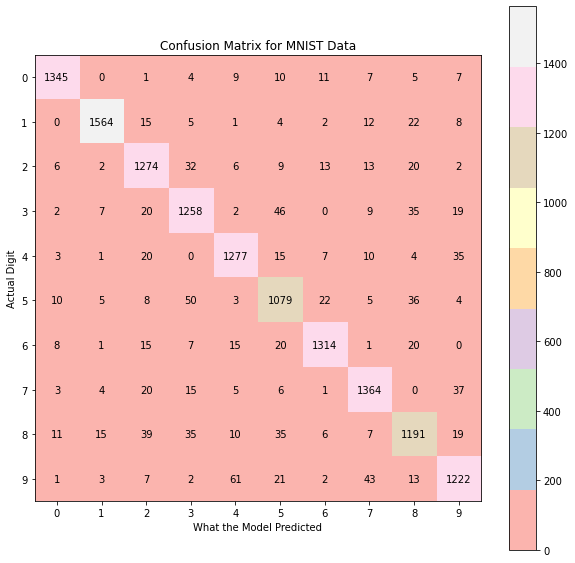

In [22]:

#This looks complicated, but its just directions for formatting the graph below. No worries if it doesn't make sense right now!
plt.figure(figsize = (10,10))
plt.imshow(cm, cmap = 'Pastel1')
plt.title('Confusion Matrix for MNIST Data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel("Actual Digit")
plt.xlabel('What the Model Predicted')

plt.colorbar()


width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy = (x,y), horizontalalignment = 'center', verticalalignment = 'center')
        

### From the Confusion Matrix above, what gave our model the most trouble when it was asked to classify the digit "4"? Does this make sense?

# Great job! We've just taught a machine how to read handwritten numbers!!